<a href="https://colab.research.google.com/github/alisyanisrinaaa/Checkpoint-DataMining/blob/main/Checkpoint%20(5)%20-%20Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Shopping Trends Data**

#**Import Library**

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

**Library Splitting Data**

In [92]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [93]:
from sklearn.preprocessing import MinMaxScaler

**Import untuk Build Model**

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

**Import untuk Param Grid**

In [95]:
from sklearn.model_selection import GridSearchCV

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis kepuasan pelanggan dan tren terkini dalam berbelanja. Fokus dari analisis ini adalah untuk memahami perilaku pelanggan, merancang strategi pemasaran yang lebih efektif, meningkatkan pengalaman pelanggan, membuat keputusan yang tepat dan lebih baik dalam pengelolaan stok dan operasional, serta mengoptimalkan metode pembayaran yang akan ditawarkan sesuai dengan preferensi pelanggan. Strategi pemasaran akan disesuaikan dengan tren dan preferensi pelanggan, sedangkan inovasi produk dan layanan bertujuan untuk memenuhi kebutuhan pasar yang terus berkembang. Pencapaian tujuan ini diharapkan akan menciptakan hasil finansial yang kuat dan berkelanjutan dan memberikan manfaat yang bekerlanjutan untuk semua pihak.

##**Assess Situation**

Dalam melihat kondisi bisnis saat ini, perusahaan tahu bahwa data preferensi pelanggan sangat berharga, tetapi perlu dipastikan kembali keakuratannya. Perusahaan sadar akan pentingnya mengikuti tren pasar dan strategi pesaing untuk menjaga relevansi produk perusahaan. Evaluasi terus menerus dilakukan untuk menambah efektivitas strategi pemasaran dan layanan pelanggan untuk meningkatkan kepuasan pelanggan. Perusahaan akan menyesuaikan kebijakan dan operasioanl untuk mengikuti faktor ekonomi dan regulasi. Pengelolaan stok akan dioptimalkan berdasarkan analisis data, dan keamanan transaksi akan lebih diperkuat.

##**Data Mining Goals**

Goals dari analisis data ini adalah untuk mengidentifikasi pola pembelian pelanggan yang mencerminkan korelasi antara produk, membantu perusahaan untuk memahami hubungan dan kombinasi yang sedang terjadi. Lalu, perusahaan akan fokus pada segmentasi pelanggan dengan mengelompokkan pelanggan berdasarkan pola pembelian mereka. Hal ini akan membantu perusahaan dalam merancang strategi pemasaran yang lebih terfokus dan personalisasi. Selain itu, perusahaan akan menerapkan sistem rekomendasi untuk meningkatkan pengalaman pelanggan melalui penawaran produk yang lebih relevan dan disesuaikan dengan kebutuhan pelanggan. Dengan analisis ulasan dan penilaian produk, perusahaan berharap dapat memahami pandangan pelanggan mengenai produknya. Dengan mencapai tujuan-tujuan ini, perusahaan berharap dapat mengoptimalkan operasional bisnis dan memberi nilai tambah yang lebih besar bagi pelanggan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data dari sumber yang tersedia, termasuk memastikan keakuratan dataset pilihan pelanggan. Kemudian, data tersebut akan dikelompokkan berdasarkan pola pembelian, memeriksa korelasi antar produk, dan menerapkan sistem rekomendasi untuk mempersonalisasi penawaran. Evaluasi strategi pemasaran akan dilakukan untuk mengukur efektivitasnya, dan analisis sentimen dari ulasan pelanggan akan memberikan wawasan terhadap persepsi produk. Fokus pada penerapan strategi baru dan pengembangan produk untuk meningkatkan kinerja bisnis. Proses pemantauan dan pengembangan berkelanjutan dilakukan untuk menyesuaikan strategi dengan perubahan tren dan kebutuhan pasar. Keamanan data dan privasi pelanggan akan menjadi prioritas di setiap tahapan proyek ini.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber Dataset : https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset



In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/alisyanisrinaaa/Checkpoint-DataMining/main/shopping_trends.csv')

In [97]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


##**Describe Data**

####Informasi Dasar

In [98]:
jumlah_baris, jumlah_kolom = df.shape

print(f"Jumlah Baris : {jumlah_baris} Baris")
print(f"Jumlah Kolom : {jumlah_kolom} Kolom")

Jumlah Baris : 3900 Baris
Jumlah Kolom : 19 Kolom


Pada dataset ini terdapat 3900 baris dan 19 kolom

####Informasi Lanjutan

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Pada dataset ini terdapat 19 kolom dengan nama kolom dan tipe data kolom yang berbeda. Berikut adalah penjelasannya :    
1. **Customer ID** : ID unik untuk setiap pelanggan dan memiliki tipe data integer.
2. **Age** : Usia pelanggan dan memiliki tipe data integer.
3. **Gender** : Jenis kelamin setiap pelanggan dan memiliki tipe data string.
4. **Item Purchased** : Barang yang dibeli oleh pelanggan dan memiliki tipe data string.
5. **Category** : Kategori produk dari item yang telah dibeli oleh pelanggan dan memiliki tipe data string.
6. **Purchase Amount (USD)** : Jumlah uang yang dikeluarkan oleh pelanggan untuk melakukan pembelian (menggunakan Dolar Amerika) dan memiliki tipe data integer.
7. **Location** : Lokasi pembelian atau pengiriman dan memiliki tipe data string.
8. **Size** : Ukuran barang yang dibeli dan memiliki tipe data string.
9. **Color** : Warna barang yang dibeli dan memiliki tipe data string.
10. **Season** : Musim pembelian dan memiliki tipe data string.
11. **Review Rating** : Penilaian pelanggan terhadap suatu produk atau layanan dan memiliki tipe data float.
12. **Subscription Status** : Status langganan pelanggan (berlangganan atau tidak) dan memiliki tipe data string.
13. **Payment Method** : Metode pembayaran yang digunakan pelanggan dan memiliki tipe data string.
14. **Shipping Type** : Jenis pengiriman yang dipilih oleh pelanggan dan memiliki tipe data string.
15. **Discount Applied** : Apakah diskon diterapkan atau tidak dan memiliki tipe data string.
16. **Promo Code Used** : Apakah pelanggan menggunakan kode promo atau tidak dan memiliki tipe data string.
17. **Previous Purchases** : Jumlah pembelian sebelumnya oleh pelanggan dan memiliki tipe data integer.
18. **Preferred Payment Method** : Metode pembayaran yang lebih disukai oleh pelanggan dan memiliki tipe data string.
19. **Frequency of Purchases** : Seberapa sering pelanggan melakukan pembelian dan memiliki tipe data string.

Jadi, kesimpulannya adalah terdapat **1 tipe data float, 4 tipe data integer, dan 14 tipe data string.**

####Informasi Statistik Deskriptif

In [100]:
df.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


Berikut adalah penjelasan untuk nilai statistika deskriptif pada dataset ini:
1. **Customer ID :**
 *   Count : Jumlah total baris dalam dataset mencerminkan jumlah pelanggan, yakni 3900 pelanggan.

2. **Age :**
  * Mean : Rata-rata usia pelanggan dalam dataset adalah 44 tahun.
  * Std : Standar deviasi usia pelanggan, mengukur sejauh mana nilai usia tersebar dari rata-rata, yakni 15 tahun.
  * Min : Usia minum pelanggan dalam dataset, yakni 18 tahun.
  * 25% : Nilai usia dibawah 25% pelanggan, yakni 31 tahun.
  * 50% : Median atau nilai tengah usia pelanggan, yakni 44 tahun.
  * 75% : Nilai usia dibawah 75% pelanggan, yakni 57 tahun.
  * Max : Usia maksimum pelanggan dalam dataset, yakni 70 tahun.

3. **Purchases Amount (USD) :**
  * Mean : Rata-rata jumlah pembelian pelanggan pada dataset adalah 59.8 USD.
  * Std : Standar deviasi dari jumlah pembelian, mengukur sejauh mana nilai-nilai pembelian tersebar dari rata-rata adalah 23.7 USD.
  * Min : Jumlah pembelian minimum adalah 20 USD.
  * 25% : Nilai pembelian dibawah 25% pelanggan adalah 39 USD.
  * 50% : Median atau nilai tengah pembelian adalah 60 USD.
  * 75% : Nilai pembelian di bawah 75% pelanggan adalah 81 USD.
  * Max : Jumlah pembelian maksimum adalah 100 USD.

4. **Review Rating :**
  * Mean : Rata-rata penilaian produk atau layanan yang diberikan oleh pelanggan adalah 3.75
  * Std : Standar deviasi dari nilai penilaian, mengukur sejauh mana penilaian tersebar dari rata-rata adalah 0.72
  * Min : Nilai penilaian minimum yang diberikan oleh pelanggan adalah 2.5
  * 25% : Nilai penilaian di bawah 25% pelanggan adalah 3.1
  * 50% : Median atau nilai tengah penilaian adalah 3.7
  * 75% : Nilai penilaian di bawah 75% pelanggan adalah 4.4
  * Max : Nilai penilaian maksimum yang diberikan oleh pelanggan adalah 5.0

5. **Previous Purchases :**
  * Mean : Rata-rata jumlah pembelian sebelumnya yang telah dilakukan oleh pelanggan adalah 25.35
  * Std : Standar deviasi dari jumlah pembelian sebelumnya, mengukur sejauh mana nilai-nilai tersebut tersebar dari rata rata adalah 14.45
  * Min : Jumlah pembelian sebelumnya minimum 1
  * 25% : Nilai pembelian sebelumnya di bawah 25% pelanggan adalah 13.
  * 50% : Median atau nilai tengah pembelian sebelumnya adalah 25.
  * 75% : Nilai pembelian sebelumnya di bawah 75% pelanggan adalah 38.
  * Max : Jumlah pembelian sebelumnya maksimum 50.





##**Exploratory Data Analysis**

<Axes: ylabel='Gender'>

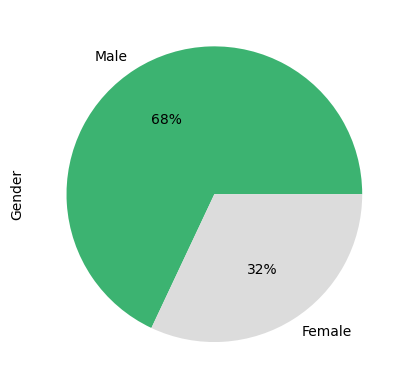

In [101]:
fig, ax = plt.subplots()
gender_counts = df['Gender'].value_counts()

colors = {'Female' : 'gainsboro', 'Male' : 'mediumseagreen'}
gender_counts.plot(kind='pie', autopct='%0.0f%%', startangle=360, colors=[colors[k] for k in gender_counts.index])

Customer Shopping Trends Data adalah cara kita memahami kebiasaan belanja pelanggan. Dari visualisasi ini menunjukkan diagram lingkaran yang terbagi menjadi 2 bagian, yaitu :
* **Bagian Hijau** : Persentase Pria, yaitu 68%
* **Bagian Abu-Abu** : Persentase Wanita, yaitu 32%

Berdasarkan informasi diatas dapat disimpulkan bahwa **Mayoritas** pelanggan adalah **Pria** dengan persentase 68% dan **Minoritas** pelanggan adalah **Wanita** dengan persentase 32%

Solusi yang dapat dilakukan untuk meningkatkan presentase pelanggan wanita, seperti:
1. Memahami kebutuhan dan preferensi wanita. Disini kita dapat melakukan riset pasar terlebih dahulu untuk memahami apa yang dibutuhkan wanita dalam berbelanja.
2. Menawarkan produk dan layanan yang menarik wanita. Disini kita dapat memperluas pilihan produk yang sesuai dengan kebutuhan wanita dan tawarkan cuka layanan yang dapat meningkatkan pengalaman berbelanja wanita, seperti konsultasi.
3. Memanfaatkan influencer wanita. Jalin kerjasama dengan influencer wanita yang memiliki kredibilitas dan pengikut yang bantak di targer audience wanita. Gunakan influencer wanita untuk mempromosikan produk dan layanan perusahaan kepada audiens mereka.

<Axes: ylabel='Category'>

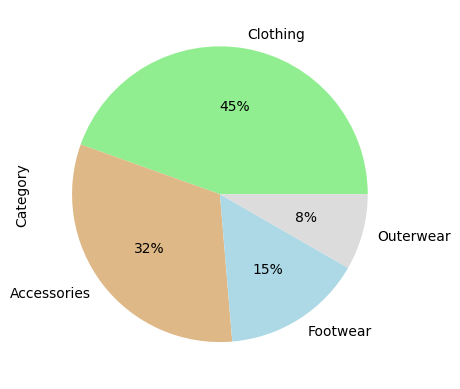

In [102]:
category_counts = df['Category'].value_counts()

colors = {'Clothing' : 'lightgreen', 'Accessories' : 'burlywood', 'Footwear' : 'lightblue', 'Outerwear' : 'gainsboro' }
category_counts.plot(kind='pie', autopct='%0.0f%%', startangle=360, colors=[colors[k] for k in category_counts.index])

Visualisasi ini menggambarkan persentase penjualan untuk setiap kategori dalam dataset customer shopping trends data. Visualisasi ini menggunakan pie chart yang terbagi menjadi 4 bagian, yaitu :
* **Bagian Hijau** : Persentase Clothing, yaitu 45%
* **Bagian Cokelat** : Persentase Accessories, yaitu 32%
* **Bagian Biru** : Persentas Footwear, yaitu 15%
* **Bagian Abu-Abu** : Persentase Outerwear, yaitu 8%

Berdasarkan informasi diatas dapat disimpulkan bahwa kategori **"Clothing"** merupakan kategori yang **paling populer**, terhitung sebesar 45% dari seluruh penjualan. Lalu disusul oleh Accessories sebesar 32%, Footwear sebesar 15%, dan Outerwear sebesar 8%.

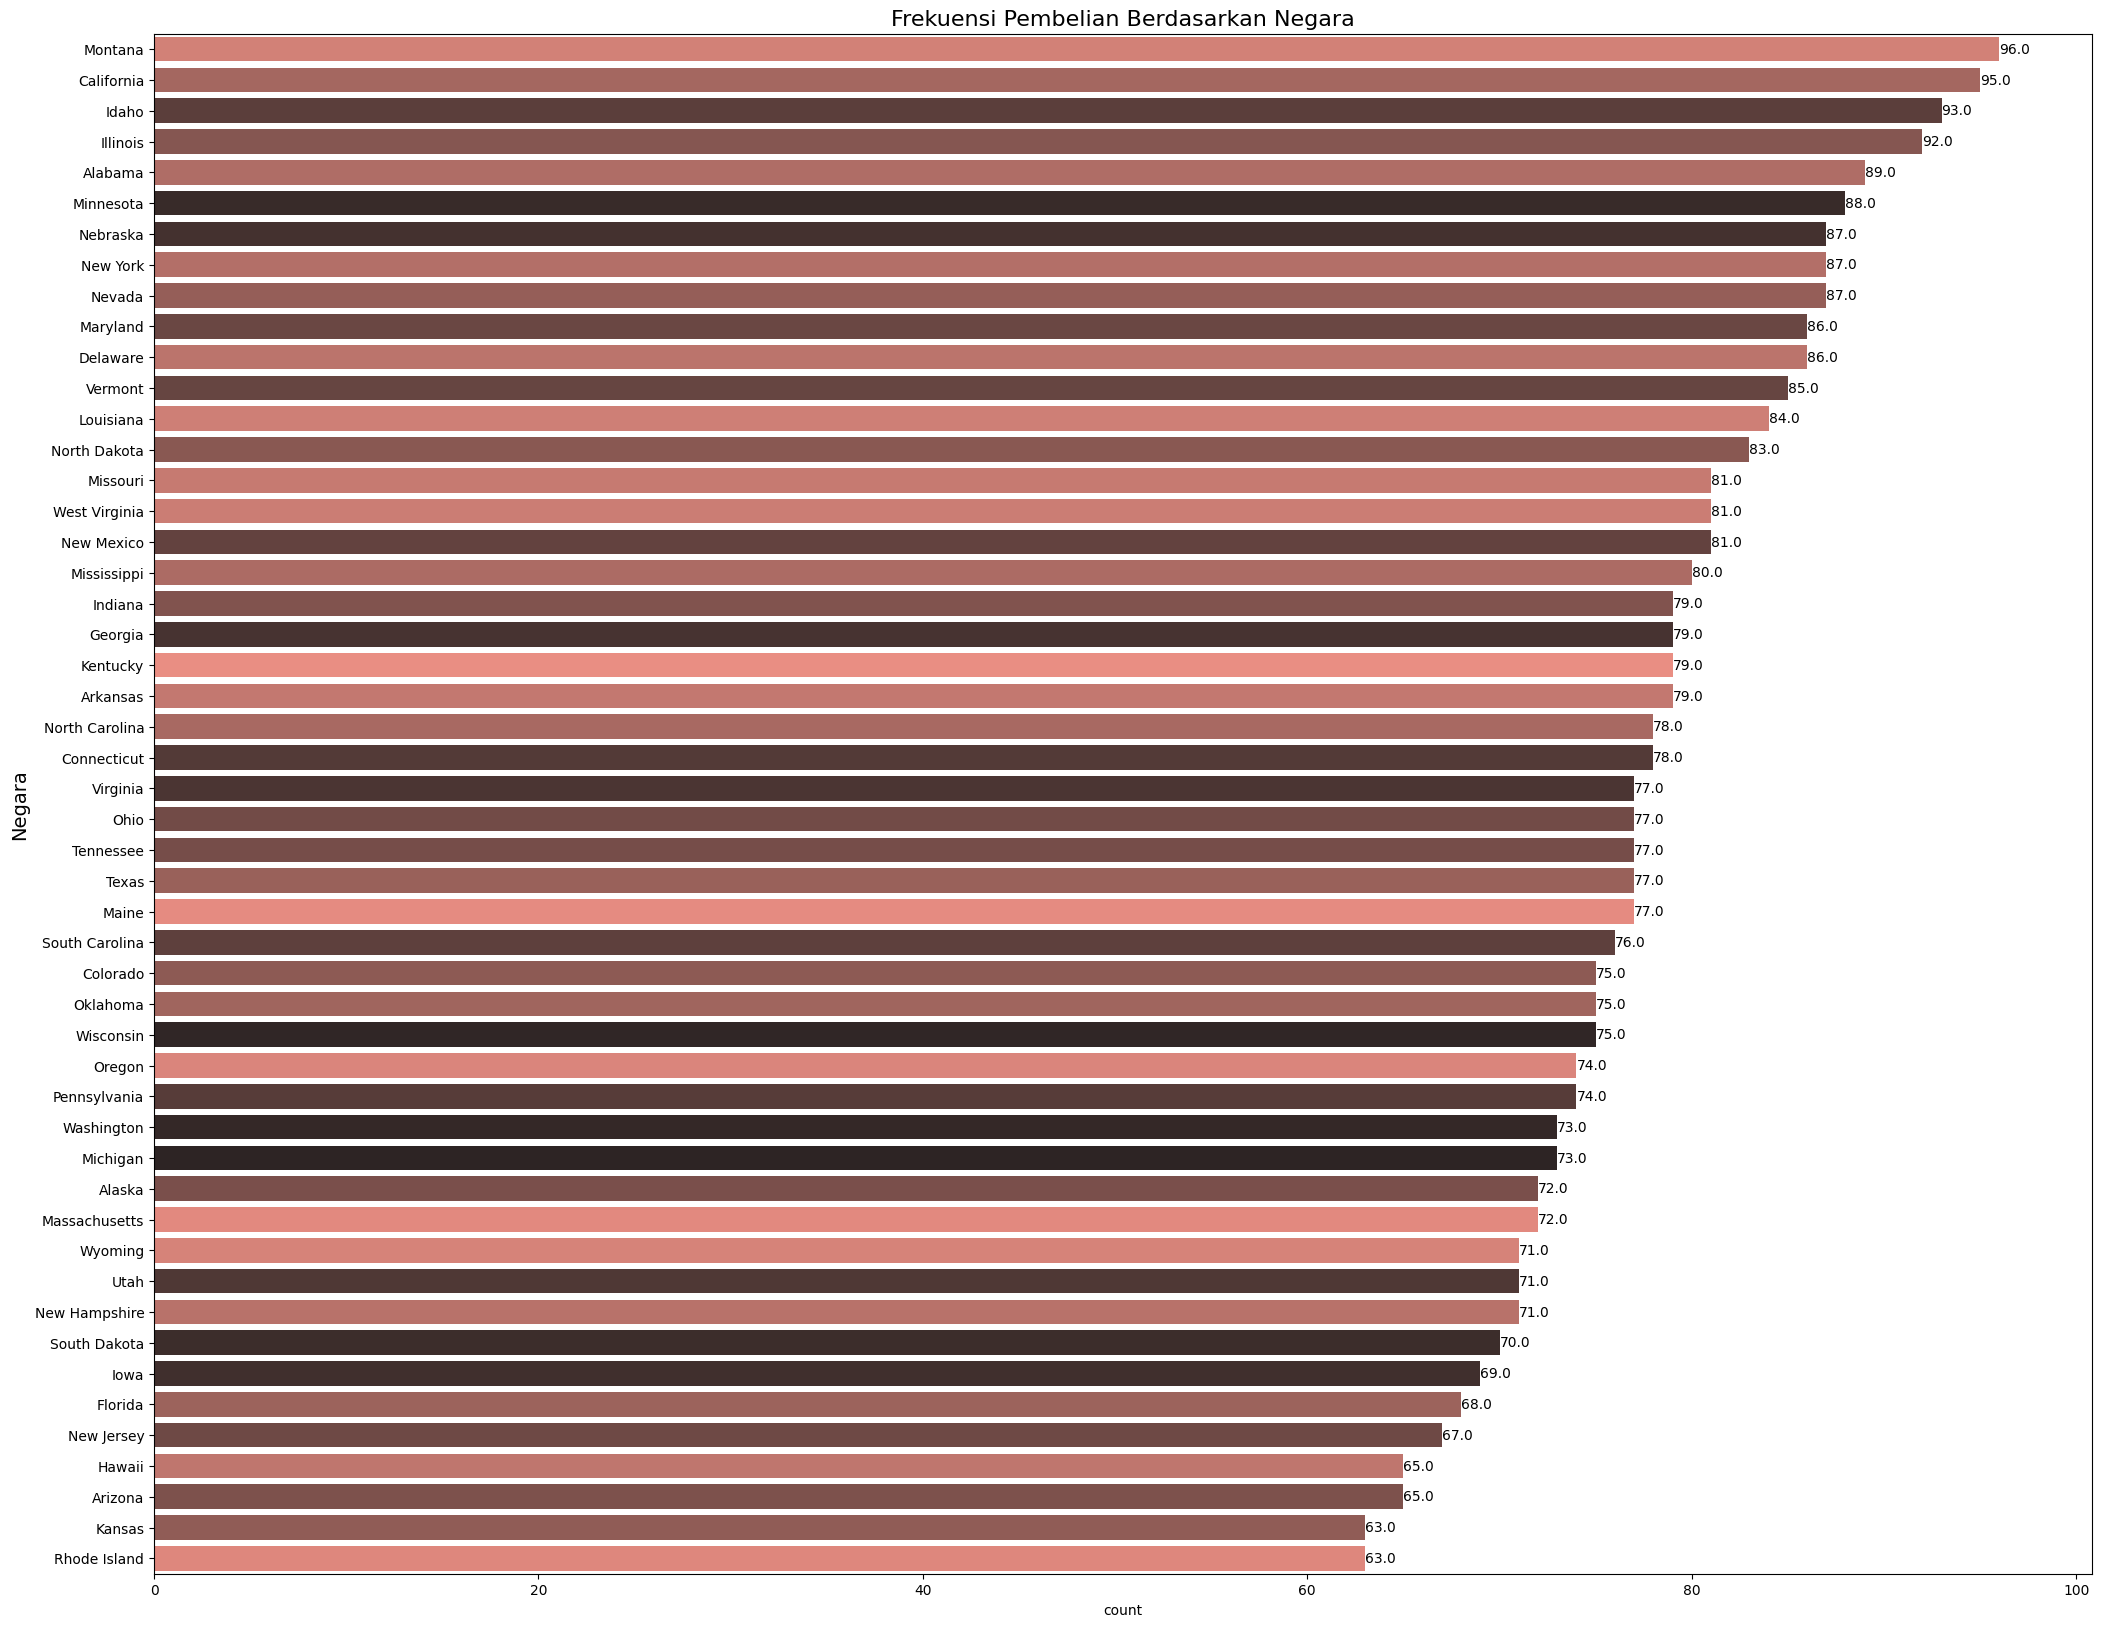

In [103]:
colors = sns.color_palette("dark:salmon_r", n_colors=len(df['Location'].unique()))

plt.figure(figsize=(25, 20))
ax = sns.countplot(y='Location', data=df, palette=colors, hue='Location', order=df['Location'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Frekuensi Pembelian Berdasarkan Negara', fontsize=16)
plt.ylabel('Negara', fontsize=14)

plt.show()

Gambar diatas menunjukkan grafik yang menggambarkan frekuensi pembelian pelanggan di berbagai lokasi di Amerika Serikat. Dari grafik diatas dapat disimpulkan bahwa:
* **Frekuensi Pembelian Tertinggi** berada di negara bagian Barat dan Timur Laut Amerika Serikat. Hal ini dapat disebabkan oleh beberapa faktor, seperti kepadatan penduduk, tingkat pendapatan, dan akses ke toko retail.
* **Frekuensi Pembelian Terendah** berada di negara bagian Selatan dan Midwest Amerika Serikat. Hal ini disebabkan oleh beberapa faktor, seperti kepadatan penduduk yang lebih rendah, tingkat pendapatan yang lebih rendah, dan akses yang lebih terbatas ke toko retail.
* Dari sini kita dapat mengamati mengenai pola regionalnya. Misalnya negawa bagian di bagian Barat memiliki frekuensi pembelian yang tinggi, sedangkan negara bagian di bagian Selatan memiliki pembelian yang rendah.

Berdasarkan grafik frekuensi diatas, berikut beberapa solusi untuk meningkatkan frekuensi pembelian di negara bagian yang memiliki tingkat pembelian yang rendah :
1. Membuka toko retail baru di daerah dengan akses terbatas, terutama di daerah terpencil dan pedesaan.
2. Menawarkan layanan online dan mobile shopping yang mudah diakses oleh pelanggan.
3. Mengadakan acara dan promo yang menarik pelanggan didaerah tersebut.
4. Melakukan riset pasar untuk memahami kebutuhan pelanggan di daerah tersebut dan menawarkan produk dan layanan yang sesuai dengan kebutuhan pelanggan di daerah tersebut.
5. Bekerja sama dengan toko lokal untuk menyediakan produk dan layanan


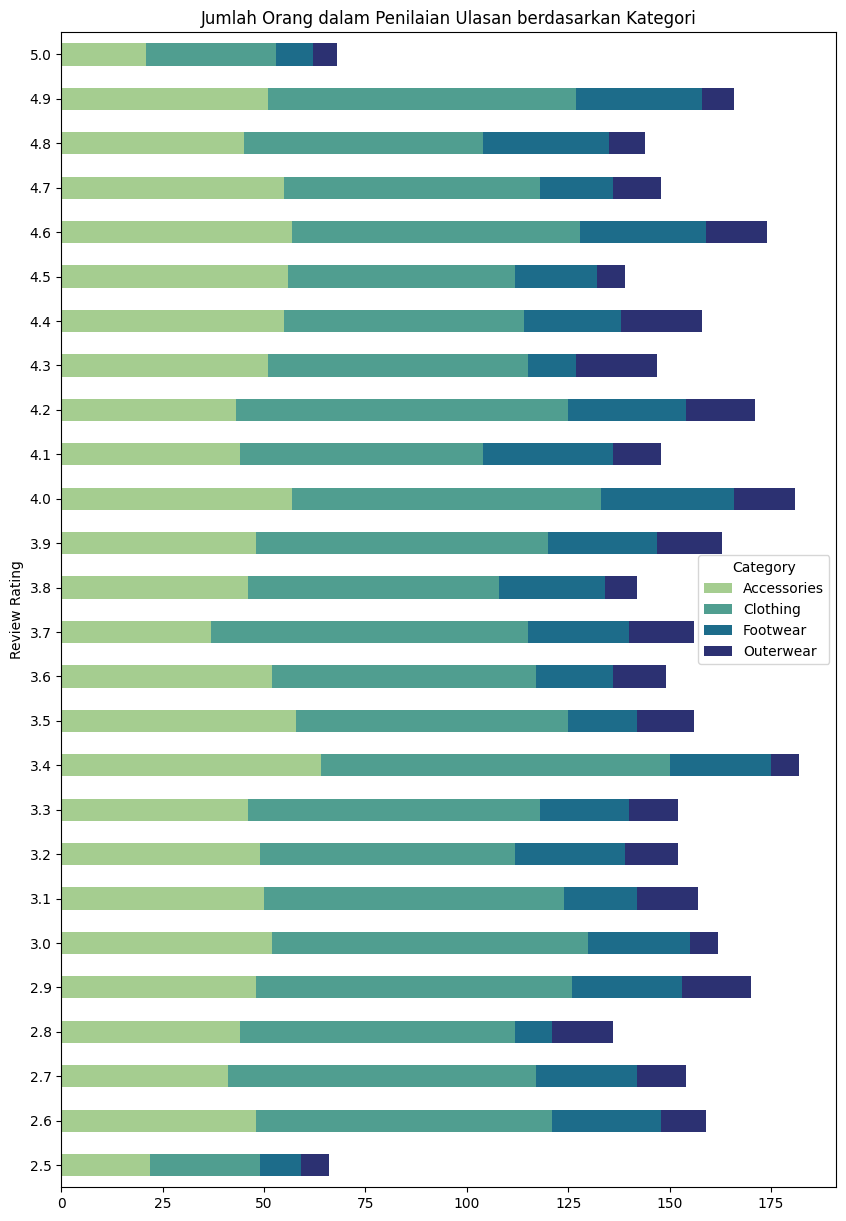

In [104]:
pivot_table = df.pivot_table(index='Review Rating', columns='Category', aggfunc='size', fill_value=0)

pivot_table.plot(kind='barh', stacked=True, colormap='crest', figsize=(10, 15))

plt.ylabel('Review Rating')
plt.title('Jumlah Orang dalam Penilaian Ulasan berdasarkan Kategori')
plt.show()

Berdasarkan informasi dari grafik batang diatas, dapat disimpulkan bahwa :
* Kategori Clothing memiliki jumlah ulasan terbanyak secara keseluruhan, lalu diikuti oleh Accessories, Footwear, dan Outerwear.
* Untuk semua kategori, rating terendah (2.5) memiliki jumlah pengulas paling sedikit, sedangkan rating di kisaran 3.0 hingga 4.0 memiliki jumlah pengulas paling banyak.
* Kategori Clothing memiliki distribusi ulasan yang paling beragam di antara semua kategori.
* Kategori Footwear memiliki tren penurunan yang cukup tajam pada rating di bawah 4.0

In [105]:
df.corr().round(4)

<ipython-input-105-5ebca4ea10ab>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.0000,-0.0041,0.0110,0.0013,-0.0392
Age,-0.0041,1.0000,-0.0104,-0.0219,0.0404
Purchase Amount (USD),0.0110,-0.0104,1.0000,0.0308,0.0081
Review Rating,0.0013,-0.0219,0.0308,1.0000,0.0042
Previous Purchases,-0.0392,0.0404,0.0081,0.0042,1.0000


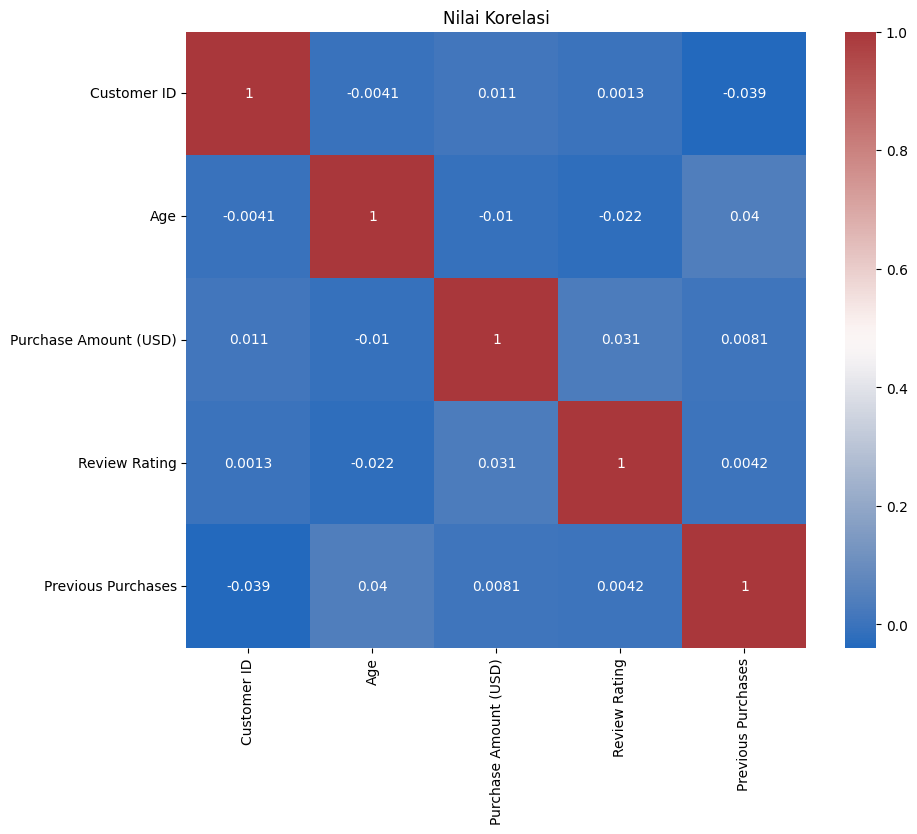

In [106]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Nilai Korelasi')
plt.show()

**KORELASI**

**Keterangan :**
* Nlai di dalam kotak merupakan koefisien relasi antara dua variabel yang bersangkutan.
* Warna kotak menunjukkan arah hubungan:
  * **Biru** : Korelasi positif (Jika nilai satu variabel naik, maka nilai variabel lain juga naik).
  * **Merah** : Korelasi negatif (Jika nilai satu variabel naik, maka nilai variabel lain turun).
* Skala warna menunjukkan kekuatan hubungan:
  * **Warna Gelap** memiliki korelasi yang lebih kuat
  * **Warna Terang** memiliki korelasi yang lebih lemah

**Kesimpulan**
* Nilai korelasi antara **Customer ID dan Review Rating** adalah 0.013. Korelasi ini memiliki hubungan yang positif dan kekuatan yang sangat lemah. Artinya, Customer ID tidak dapat digunakan untuk memprediksi rating ulasan dengan akurat.
* Nilai korelasi antara **Customer ID dan Previous Purchases** adalah -0.039. Korelasi ini sangat lemah dan negatif. Artinya, Customer ID tidak dapat digunakan untuk memprediksi jumlah pembelian sebelumnya dengan akurat.
* Nilai korelasi antara **Age dan Review Rating** adalah -0.022. Korelasi ini sangat lemah dan negatif. Artinya, ketika usia meningkat, maka peringkat ulasan cenderung menurun.
* Nilai korelasi antara **Age dan Purchase Amount (USD)** adalah -0.01. Korelasi ini memiliki hubungan yang bernilai negatif dan menunjukkan kekuatan yang lemah. Artinya, ketika usia meningkat, jumlah pembelian (USD) cenderung menurun.
* Nilai korelasi antara **Purchase Amount (USD) dan Review Rating** adalah 0.031. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang lemah. Artinya, ketika jumlah pembelian (USD) meningkat, maka peringkat ulasan cenderung meningkat.
* Nilai korelasi antara **Purchase Amount (USD) dan Previous Purchases** adalah 0.0081. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang sangat lemah. Artinya, pelanggan yang telah membeli banyak di masa lalu tidak menunjukkan kecenderungan untuk membeli lebih banyak di masa depan.
* Nilai korelasi antara **Review Rating dan Previous Purchases**  adalah 0.0042. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang sangat lemah. Artinya, tidak ada hubungan yang signifikan antara kedua variabel ini.



##**Verify Data Quality**

####Missing Values

In [107]:
pd.DataFrame(df.isna().sum(), columns=['Jumlah Data Kosong'])

,Jumlah Data Kosong
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Semua kolom pada dataset ini memiliki jumlah data kosong 0 yang berarti tidak ada data kosong.

In [108]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Dapat dilihat dari hasil diatas tidak terdapat nilai NaN di kolom mana pun sehingga tidak ada kolom yang berisi data kosong.

Berdasarkan hasil analisis sementara di atas, dapat ditarik sebuah kesimpulan bahwa data tersebut memiliki kualitas yang sangat baik, dikarenakan tidak ada data yang kosong.

####Outliers Values

In [109]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Nama Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Nama Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Nama Kolom', axis=1)

display(results_df)

Nama Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Pada setiap kolom, persentase outlier dilaporkan sebagai 0,0%. Artinya, tidak ada titik data yang dianggap outlier dalam kolom-kolom ini berdasarkan kriteria atau metode yang digunakan untuk deteksi outlier.

####Duplicated Values

In [110]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

Berdasarkan hasil analisis sementara di atas, dapat ditarik sebuah kesimpulan bahwa data tersebut memiliki kualitas yang sangat baik, dikarenakan tidak ada data yang terduplikasi.

####Inconsistent Values / Noise (Optional)

In [111]:
inconsistent_values_found = False

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        inconsistent_values = df.loc[~pd.to_numeric(df[column], errors='coerce').notna(), column]
        if not inconsistent_values.empty:
            print(f"\nNilai {column} yang Tidak Sesuai:")
            print(inconsistent_values)
            inconsistent_values_found = True

if not inconsistent_values_found:
    print("\nTidak Ada Nilai yang Tidak Sesuai dalam Dataset.")


Tidak Ada Nilai yang Tidak Sesuai dalam Dataset.


Pada dataset ini tidak ada nilai yang dianggap inkonsisten. Jadi, semua nilai yang ada pada dataset ini berada dalam batas yang dianggap sesuai atau tidak ada yang melanggar aturan.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####Pengecekkan Missing Values

In [112]:
print((df.isna().sum() / len(df) * 100))

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64


Dapat dilihat bahwa tidak terdapat nilai yang hilang / kosong, yang berarti pengumpulan data yang telah dilakukan berhasil karena lengkap dan konsisten.

#####Hapus Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Imputasi Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Pengecekkan Ulang

In [113]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Customer ID,0.0
Age,0.0
Gender,0.0
Item Purchased,0.0
Category,0.0
Purchase Amount (USD),0.0
Location,0.0
Size,0.0
Color,0.0
Season,0.0


Setelah dilakukan pemeriksaan ulang, dapat dilihat bahwa tidak ditemukan nilai yang hilang/kosong.

###**Penanganan Duplicated Values**

#####Pengecekkan Nilai Duplikat

In [114]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


Berdasarkan hasil di atas, terdapat baris kosong dalam setiap kolom. Artinya, tidak ada data yang terduplikasi.

#####Hapus Nilai Duplikasi

In [115]:
df = df.drop_duplicates()

Berdasarkan pengecekan nilai duplikat di atas, nilai yang terduplikat akan dihapus secara otomatis. Jika tidak ada nilai duplikat, maka tidak akan ada perubahan yang terjadi.

###**Penanganan Outliers**

#####Pengecekkan Outliers

In [116]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Berdasarkan hasil diatas, dapat dilihat bahwa kelima kolom tersebut memiliki nilai outliers sebesar **0.0**. Artinya, tidak ada data yang nilainya terlalu jauh dari nilai-nilai lainnya.

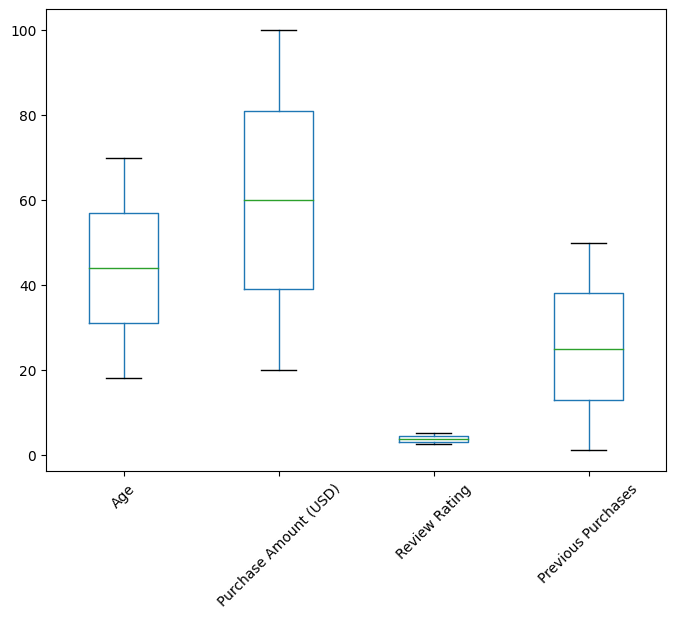

In [117]:
boxplot = df.drop('Customer ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari grafik diatas, tidak ditemukan nilai yang jauh dari jangkauan.

#####Hapus Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Imputasi Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Pengecekkan Ulang

In [118]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Setelah dilakukan pengecekkan ulang, tidak ditemukan nilai yang terlalu jauh dari nilai-nilai lainnya.

##**Construct Data**

####Melakukan Rekayasa Fitur (Feature Engineering)

In [119]:
def categorize_age(age):
    if age < 25:
        return 'Teens'
    elif 25 <= age < 45:
        return 'Adult'
    else:
        return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

In [120]:
def spending_category(previous):
    if previous < 10:
        return 'Middle'
    elif 10 <= previous < 40:
        return 'Moderate'
    else:
        return 'Much'

df['Spending Category'] = df['Previous Purchases'].apply(spending_category)

####Pengecekkan Hasil

In [121]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Category,Spending Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Elderly,Moderate
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teens,Middle
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Elderly,Moderate
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Teens,Much
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,Adult,Moderate
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Elderly,Much
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,Elderly,Moderate
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,PayPal,Express,No,No,24,Venmo,Weekly,Adult,Moderate


Berdasarkan data diatas, terdapat kolom baru yang bernama **Age Category** yang digunakan untuk menyimpan data sesuai dengan kategori usia dan **Spending Category** yang digunakan untuk menyimpan data sesuai dengan kategori pembelian sebelumnya.

##**Data Reduction**

####Mengurangi Fitur -Fitur yang Kurang Relevan

In [122]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [123]:
df2 = df.drop(['Subscription Status', 'Preferred Payment Method'], axis = 1)

Menghapus kolom **Subscription Status dan Preferred Payment Method** karena kurang relevan. Kolom tersebut dihapus karena untuk menyederhanakan analisis dan memusatkan perhatian kepada kolom-kolom yang lebih penting.

####Pengecekkan Hasil

In [124]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age Category,Spending Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,Yes,Yes,14,Fortnightly,Elderly,Moderate
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,Yes,Yes,2,Fortnightly,Teens,Middle
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,Yes,Yes,23,Weekly,Elderly,Moderate
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,Yes,Yes,49,Weekly,Teens,Much
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,Yes,Yes,31,Annually,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,Cash,2-Day Shipping,No,No,32,Weekly,Adult,Moderate
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,PayPal,Store Pickup,No,No,41,Bi-Weekly,Elderly,Much
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Credit Card,Standard,No,No,24,Quarterly,Elderly,Moderate
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,PayPal,Express,No,No,24,Weekly,Adult,Moderate


Dapat dilihat pada tabel diatas bahwa kolom **Subscription Status dan Preferred Payment Method** yang tadinya ada, namun setelah dilakukan pemfilteran data kolom-kolom tersebut telah dihapus karena kurang relevan.

##**Data Transformation**

####Mapping

In [125]:
df2 ['Gender'] = df2['Gender'].map({'Male' : 0, 'Female' : 1})
df2 ['Category'] = df2['Category'].map({'Accessories' : 0, 'Clothing' : 1, 'Footwear' : 2, 'Outerwear' : 3 }).astype(int)
df2 ['Discount Applied'] = df2['Discount Applied'].map({'Yes' : 1, 'No' : 0})
df2 ['Promo Code Used'] = df2['Promo Code Used'].map({'Yes' : 1, 'No' : 0})
df2 ['Season'] = df2['Season'].map({'Winter': 0, 'Summer' : 1, 'Fall' : 2, 'Spring':3})
df2 ['Frequency of Purchases'] = df2['Frequency of Purchases'].map({'Annually' : 0, 'Bi-Weekly' : 1, 'Every 3 Months' : 2, 'Fortnightly' : 3, 'Monthly' : 4, 'Quarterly' : 5, 'Weekly' : 6})

In [126]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age Category,Spending Category
0,1,55,0,Blouse,1,53,Kentucky,L,Gray,0,3.1,Credit Card,Express,1,1,14,3,Elderly,Moderate
1,2,19,0,Sweater,1,64,Maine,L,Maroon,0,3.1,Bank Transfer,Express,1,1,2,3,Teens,Middle
2,3,50,0,Jeans,1,73,Massachusetts,S,Maroon,3,3.1,Cash,Free Shipping,1,1,23,6,Elderly,Moderate
3,4,21,0,Sandals,2,90,Rhode Island,M,Maroon,3,3.5,PayPal,Next Day Air,1,1,49,6,Teens,Much
4,5,45,0,Blouse,1,49,Oregon,M,Turquoise,3,2.7,Cash,Free Shipping,1,1,31,0,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,Hoodie,1,28,Virginia,L,Turquoise,1,4.2,Cash,2-Day Shipping,0,0,32,6,Adult,Moderate
3896,3897,52,1,Backpack,0,49,Iowa,L,White,3,4.5,PayPal,Store Pickup,0,0,41,1,Elderly,Much
3897,3898,46,1,Belt,0,33,New Jersey,L,Green,3,2.9,Credit Card,Standard,0,0,24,5,Elderly,Moderate
3898,3899,44,1,Shoes,2,77,Minnesota,S,Brown,1,3.8,PayPal,Express,0,0,24,6,Adult,Moderate


Pada hasil di atas dengan menggunakan mapping yang bertujuan untuk memberikan klasifikasi numerik yang dapat diproses oleh model. Berikut adalah penjelasannya :
1. Klasifikasi numerik kepada setiap jenis kelamin guna memudahkan analisis data. Dalam hal ini, jenis kelamin **"Male"** direpresentasikan dengan angka **0**, dan **"Female"** dengan angka **1**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis kelamin dalam dataset dengan lebih efisien.
2. Klasifikasi numerik kepada setiap jenis kategori guna memudahkan analisis data. Dalam hal ini, kategori **"Accessories"** direpresentasikan dengan angka **0**, **"Clothing"** dengan angka **1**, **"Footwear"** dengan angka **2**, dan **"Outerwear"** dengan angka **3**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis kategori dalam dataset dengan lebih efisien.
3. Klasifikasi numerik kepada setiap jenis penggunaan kode dan diskon guna memudahkan analisis data. Dalam hal ini, jika **"Yes"** direpresentasikan dengan angka **1**, dan **"No"** dengan angka **0**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi penggunaan kode dan diskon dalam dataset dengan lebih efisien.


####Encoding

In [127]:
df2 = pd.get_dummies(df2)

In [128]:
df2.head()

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,...,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Age Category_Adult,Age Category_Elderly,Age Category_Teens,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much
0,1,55,0,1,53,0,3.1,1,1,14,...,0,0,0,0,0,1,0,0,1,0
1,2,19,0,1,64,0,3.1,1,1,2,...,0,0,0,0,0,0,1,1,0,0
2,3,50,0,1,73,3,3.1,1,1,23,...,1,0,0,0,0,1,0,0,1,0
3,4,21,0,2,90,3,3.5,1,1,49,...,0,1,0,0,0,0,1,0,0,1
4,5,45,0,1,49,3,2.7,1,1,31,...,1,0,0,0,0,1,0,0,1,0


Encoding digunakan untuk mengubah setiap kolom kategorikal menjadi satu set kolom biner (0 atau 1). Kolom baru ini akan mewakili setiap nilai unik dalam variabel kategorikal asli. Jika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan memiliki nilai 1, sedangkan kolom-kolom lainnya akan memiliki nilai 0.

In [129]:
# Menyimpan DataFrame setelah Tahap Data Preparation
df2.to_csv('Data Cleaned.csv')

#**MODELLING**

####**Insiasi Variabel untuk Menyimpan Dataframe**

In [130]:
# DATAFRAME SETELAH DICLEANING

df3 = pd.read_csv('https://raw.githubusercontent.com/alisyanisrinaaa/Checkpoint-DataMining/main/Data%20Cleaned%202.csv')

##**Select Modelling Techniques**

Berdasarkan pemahaman bisnis, analisis data ini bertujuan untuk memprediksi perilaku pembelian pelanggan di masa mendatang, seperti apakah seorang pelanggan akan melakukan pembelian tertentu, berapa banyak yang akan dibelinya, atau kapan pembelian akan dilakukan. Hal ini akan membantu perusahaan dalam merancang strategi pemasaran yang lebih terfokus dan personalisasi. Jadi, teknik pemodelan yang digunakan dalam analisis data ini adalah **Pemodelan Klasifikasi (Prediktif)**.

###**Algoritma yang digunakan**

**Gaussian Naive Bayes**

Algoritma Naive Bayes merupakan salah satu algoritma yang dapat digunakan dalam pemodelan klasifikasi. Algoritma ini digunakan untuk memprediksi probabilitas bahwa suatu observasi termasuk dalam satu kategori atau kelas tertentu berdasarkan pada fitur-fitur yang ada. Dalam analisis ini, atribut-atribut yang relevan seperti usia, jenis kelamin, lokasi, kategori barang yang dibeli, jumlah pembelian, frekuensi pembelian, dan sebagainya dapat digunakan sebagai fitur-fitur dalam model GNB. Misalnya, dengan menggunakan GNB, kita dapat memprediksi probabilitas bahwa seorang pelanggan akan membeli suatu item tertentu berdasarkan pada fitur-fitur tersebut.

**K-Nearest Neighbor**

Algoritma K-Nearest Neighbor merupakan salah satu algoritma yang dapat digunakan dalam pemodelan klasifikasi. Algoritma ini digunakan untuk mengelompokkan titik data ke dalam  memprediksi kategori dari sebuah data dengan cara mencari kategori mayoritas dari K data paling dekat (berdasarkan metrik jarak seperti Euclidean distance). KNN dapat digunakan untuk memberikan rekomendasi produk kepada pelanggan berdasarkan pada preferensi mereka dan pembelian sebelumnya. Dengan membandingkan pola pembelian pelanggan dengan pola pembelian pelanggan lainnya, KNN dapat merekomendasikan produk yang mungkin diminati oleh pelanggan. Dan KNN juga dapat digunakan untuk memprediksi apakah seorang pelanggan akan melakukan pembelian tertentu berdasarkan atribut-atribut tertentu, seperti usia, jenis kelamin, histori pembelian sebelumnya, dan lainnya.

**Decision Tree**

Algoritma Decision Tree merupakan salah satu algoritma yang dapat digunakan dalam pemodelan klasifikasi. Algoritma ini membangun model dalam bentuk pohon keputusan yang menentukan kategori target dengan membuat serangkaian keputusan berdasarkan fitur-fitur data.  Decision Tree dapat digunakan untuk memprediksi perilaku pembelian pelanggan di masa mendatang berdasarkan pada pola pembelian yang ada. Dengan memasukkan atribut-atribut seperti histori pembelian, frekuensi pembelian, dan lainnya ke dalam model Decision Tree, bisnis dapat mengantisipasi kebutuhan dan preferensi pelanggan secara proaktif.

##**Pre-Processing**

#####**Split Data**

In [131]:
x = df3.drop('Category', axis=1)
y = df3['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Kode diatas digunakan untuk pemisahan data. Kolom "Category" digunakan sebagai kolom target atau variabel yang akan diprediksi. Kolom "Category" dipilih sebagai kolom target karena dapat memprediksi kategori produk yang akan dibeli oleh pelanggan. Hal ini akan membantu dalam membangun model yang dapat memprediksi jenis produk yang paling diminati oleh pelanggan.

In [132]:
x_test

,Unnamed: 0,Customer ID,Age,Gender,Purchase Amount (USD),Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,...,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Age Category_Adult,Age Category_Elderly,Age Category_Teens,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much
839,839,840,48,0,31,3,2.6,1,1,10,...,1,0,0,0,0,1,0,0,1,0
1717,1717,1718,29,0,50,1,2.9,0,0,16,...,0,0,0,0,1,0,0,0,1,0
321,321,322,41,0,36,1,4.7,1,1,48,...,1,0,0,0,1,0,0,0,0,1
3187,3187,3188,67,1,72,0,3.2,0,0,28,...,1,0,0,0,0,1,0,0,1,0
2269,2269,2270,49,0,38,2,4.4,0,0,27,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,2184,2185,38,0,34,3,3.2,0,0,16,...,1,0,0,0,1,0,0,0,1,0
1178,1178,1179,37,0,22,3,4.9,1,1,23,...,0,0,0,0,1,0,0,0,1,0
1791,1791,1792,62,0,98,0,4.0,0,0,38,...,0,0,0,1,0,1,0,0,1,0
361,361,362,65,0,96,3,2.6,1,1,45,...,1,0,0,0,0,1,0,0,0,1


Hasil diatas berisi fitur-fitur dari data uji yang akan digunakan untuk menguji kinerja model dari data latih

In [133]:
y_test

839     1
1717    1
321     2
3187    1
2269    1
       ..
2184    2
1178    1
1791    1
361     1
135     2
Name: Category, Length: 1170, dtype: int64

DataFrame diatas berisi variabel target dalam analisis prediktif. Nilai-nilai dalam "y_test" mewakiliki kategori produk yang ingin diprediksi oleh model.

#####**Normalisasi Data**

In [134]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode diatas digunakan untuk melakukan proses normalisasi. Pada proses ini, Min-Max Scaler digunakan untuk mengubah nilai-nilai dalam data latih (x_train) dan data uji (x_test) agar memiliki rentang yang sama. Tujuannya adalah agar dapat memastikan bahwa perbedaan skala antar fitur tidak memengaruhi kinerja model.

In [135]:
x_train_norm

array([[0.29088575, 0.29088575, 0.84615385, ..., 1.        , 0.        ,
        0.        ],
       [0.29525032, 0.29525032, 0.44230769, ..., 0.        , 1.        ,
        0.        ],
       [0.61745828, 0.61745828, 0.69230769, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.22053915, 0.22053915, 0.15384615, ..., 1.        , 0.        ,
        0.        ],
       [0.90012837, 0.90012837, 0.53846154, ..., 0.        , 1.        ,
        0.        ],
       [0.81463415, 0.81463415, 0.51923077, ..., 0.        , 1.        ,
        0.        ]])

Hasil diatas merupakan hasil dari data latih(x_train) yang telah dinormalisasi menggunakan metode Min-Max Scalling

In [136]:
x_test_norm

array([[0.21514763, 0.21514763, 0.57692308, ..., 0.        , 1.        ,
        0.        ],
       [0.44056483, 0.44056483, 0.21153846, ..., 0.        , 1.        ,
        0.        ],
       [0.08215661, 0.08215661, 0.44230769, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.45956354, 0.45956354, 0.84615385, ..., 0.        , 1.        ,
        0.        ],
       [0.09242619, 0.09242619, 0.90384615, ..., 0.        , 0.        ,
        1.        ],
       [0.03440308, 0.03440308, 0.48076923, ..., 0.        , 1.        ,
        0.        ]])

Hasil diatas merupakan hasil dari data uji yang telah dinormalisasi menggunakan metode Min-Max Scaling dengan nilai minimum dan maksimum yang telah dihitung dari data latih (x train).

##**Build and Train Model**

#####**Gaussian Naive Bayes**

In [137]:
gnb = GaussianNB()

gnb.fit(x_train_norm,y_train)

GaussianNB()

Kode diatas adalah implementasi dari Algoritma Klasifikasi Gaussian Naive Bayes (GNB). Kode tersebut menciptakan, melatih, dan siap digunakan untuk melakukan klasifikasi pada data pelanggan berdasarkan pada atribut-atribut yang diberikan dalam x_train_norm.

#####**K-Nearest Neighbors**

In [138]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode di atas adalah implementasi dari Algoritma Klasifikasi K-Nearest Neighbors (KNN) untuk melakukan pelatihan model klasifikasi. Fokus utama dari proses ini adalah untuk memahami pola-pola yang ada dalam data latih untuk menghasilkan model yang dapat memprediksi label data baru berdasarkan kedekatannya dengan data yang telah dipelajari.

#####**Decision Tree**

In [139]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode diatas digunakan untuk menjalankan proses pelatihan dari model klasifikasi. Nantinya model ini dapat memahami pola-pola dalam data latih (x train) dan mengonstruksi aturan-aturan keputusan yang terwakilkan dalam struktur pohon. Model yang terlatih digunakan untuk memprediksi label dari data baru dengan menggunakan aturan-aturan yang ada dalam pohon keputusan yang telah dibangun.

####**Begins and Compare Predict**

In [140]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode diatas digunakan untuk melakukan prediksi label dari data uji mmenggunakan klasifikasi yang telah dilatih sebelumnya dengan menggunakan 3 algoritma tadi, yakni algoritma Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree (DTC)

In [141]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode diatas digunakan untuk melakukan perbandingan prekdisi yang telah dihasilkan oleh 3 model klasifikasi, yaitu Gaussian Naive Bayes, K-Nearest Neighbors, dab Decision Tree terhadap data uji (x_test) lalu akan menampilkan hasil prediksi beserta label yang sebenarnya (y_test) dalam satu data frame. Jadi pada combined_data akan berisi dara uji, variabel target, serta hasil prediksi dari ketiga model algoritma dalam satu dataset yang dapat digunakan untuk analisis lbih lanjut.

In [142]:
combined_data

,Unnamed: 0,Customer ID,Age,Gender,Purchase Amount (USD),Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,...,Age Category_Adult,Age Category_Elderly,Age Category_Teens,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much,Category,gnb_prediction,knn_prediction,dtc_prediction
0,839,840,48,0,31,3,2.6,1,1,10,...,0,1,0,0,1,0,1,1,1,1
1,1717,1718,29,0,50,1,2.9,0,0,16,...,1,0,0,0,1,0,1,1,1,1
2,321,322,41,0,36,1,4.7,1,1,48,...,1,0,0,0,0,1,2,2,1,2
3,3187,3188,67,1,72,0,3.2,0,0,28,...,0,1,0,0,1,0,1,1,1,1
4,2269,2270,49,0,38,2,4.4,0,0,27,...,0,1,0,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2184,2185,38,0,34,3,3.2,0,0,16,...,1,0,0,0,1,0,2,2,2,2
1166,1178,1179,37,0,22,3,4.9,1,1,23,...,1,0,0,0,1,0,1,1,1,1
1167,1791,1792,62,0,98,0,4.0,0,0,38,...,0,1,0,0,1,0,1,1,1,1
1168,361,362,65,0,96,3,2.6,1,1,45,...,0,1,0,0,0,1,1,1,0,1


Hasil diatas memberikan gambaran mengenai hasil prediksi dari model-model tadi

In [143]:
# Evaluasi hasil prediksi Gaussian Naive Bayes
gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Gaussian Naive Bayes:", gnb_accuracy)

# Evaluasi hasil prediksi K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors:", knn_accuracy)

# Evaluasi hasil prediksi Decision Tree Classifier
dtc_accuracy = accuracy_score(y_test, dtc_pred)
print("Decision Tree Classifier:", dtc_accuracy)

Gaussian Naive Bayes: 1.0
K-Nearest Neighbors: 0.6068376068376068
Decision Tree Classifier: 1.0


Kode diatas digunakan untuk menghitung akurasi prediksi dari 3 model algoritma dengan menggunakan fungsi "accuracy_score" dan menghitung presentase jumlah prediksi.

Dari hasil diatas dapat dilihat bahwa:
1. Model Gaussian Naive Bayes memiliki akurasi 100%, yang berarti model GNB berhasil memprediksi kategori produk dengan sempurna pada data uji yang digunakan.
2. Model K-Nearest Neighbors memiliki akurasi sebesar 60%, yang berarti model KNN memilik tingkat akurasi sekitar 60.68% dalam memprediksi kategori produk pada data uji.
3. Model Decision Tree Classifier memiliki akurasi 100%, yang berarti model DTC berhasil memprediksi kategor produk yang sempurna pada data uji yang digunakan.


##**Visualisasi**

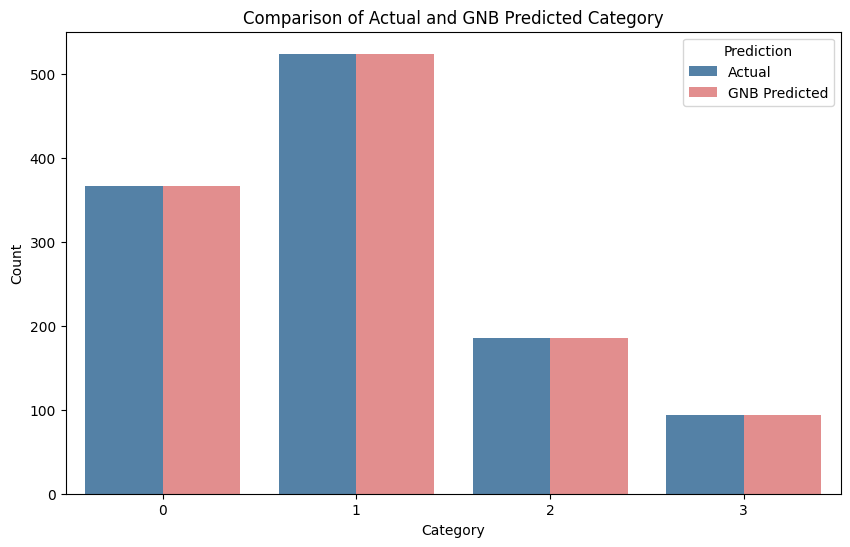

In [144]:
actual_data = combined_data['Category']
gnb_predictions = combined_data['gnb_prediction']

df_actual = pd.DataFrame({'Category': actual_data, 'Type': 'Actual'})
df_predicted = pd.DataFrame({'Category': gnb_predictions, 'Type': 'GNB Predicted'})
df_combined = pd.concat([df_actual, df_predicted])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Category', hue='Type', palette=['steelblue', 'lightcoral'])
plt.title('Comparison of Actual and GNB Predicted Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Prediction')
plt.show()

Gambar diatas menunjukkan grafik yang membandingkan prediksi dan nilai aktual dari algoritma Gaussian Naive Bayes (GNB). Berikut adalah penjelasannya:

- **Sumbu X**: Menunjukkan 4 kategori, yaitu 0 untuk Accessories, 1 untuk Clothing, 2 untuk Footwear, dan 3 untuk Outerwear
- **Sumbu Y** : Menunjukkan jumlah data dalam setiap kategori.
- **Garis Biru** : Menunjukkan nilai aktual. Nilai ini menunjukkan seberapa dekat sampel data dengan tetangganya yang sebenarnya.
- **Garis Merah** : Menunjukan nilai prediksi GNB. Nilai ini menunjukkan seberapa dekat sampel data dengan K tetangganya.

Kesimpulannya adalah nilai prediksi dan nilai aktual sama. Hal ini menunjukkan bahwa GNB memprediksi dengan tepat tetangga terdekat sampel data.

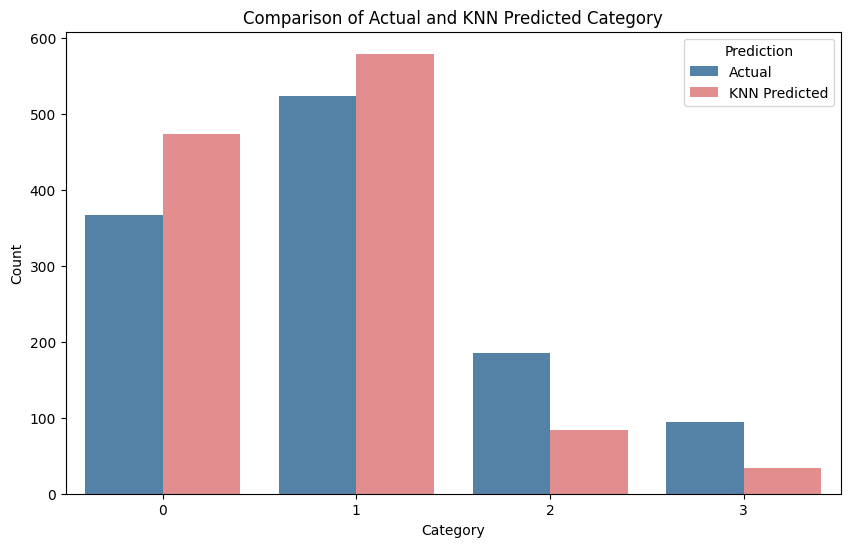

In [145]:
actual_data = combined_data['Category']
knn_predictions = combined_data['knn_prediction']

df_actual = pd.DataFrame({'Category': actual_data, 'Type': 'Actual'})
df_predicted = pd.DataFrame({'Category': knn_predictions, 'Type': 'KNN Predicted'})
df_combined = pd.concat([df_actual, df_predicted])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Category', hue='Type', palette=['steelblue', 'lightcoral'])
plt.title('Comparison of Actual and KNN Predicted Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Prediction')
plt.show()

Gambar diatas menunjukkan grafik yang membandingkan prediksi dan nilai aktual dari algoritma K-Nearest Neighbors (KNN). Berikut adalah penjelasannya:

- **Sumbu X**: Menunjukkan 4 kategori, yaitu 0 untuk Accessories, 1 untuk Clothing, 2 untuk Footwear, dan 3 untuk Outerwear
- **Sumbu Y** : Menunjukkan jumlah data dalam setiap kategori.
- **Garis Biru** : Menunjukkan nilai aktual. Nilai ini menunjukkan seberapa dekat sampel data dengan tetangganya yang sebenarnya.
- **Garis Merah** : Menunjukan nilai prediksi GNB. Nilai ini menunjukkan seberapa dekat sampel data dengan K tetangganya.

Kesimpulannya adalah model klasifikasi KNN masih belum optimal, karena adanya perbedaan antara nilai aktual dan prediksi. Dapat dilihat dari jumlah data aktual lebih tinggi dibandingkan jumlah data prediksi untuk semua kategori.

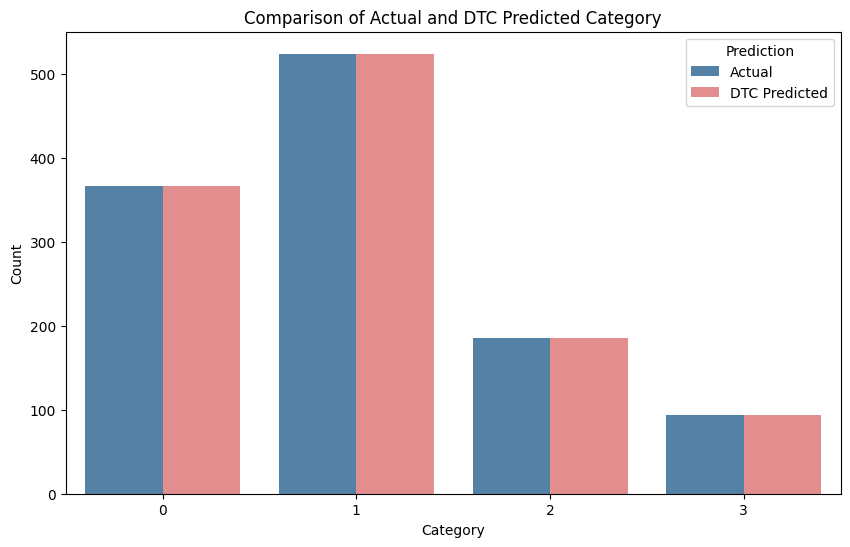

In [146]:
actual_data = combined_data['Category']
dtc_predictions = combined_data['dtc_prediction']

df_actual = pd.DataFrame({'Category': actual_data, 'Type': 'Actual'})
df_predicted = pd.DataFrame({'Category': dtc_predictions, 'Type': 'DTC Predicted'})
df_combined = pd.concat([df_actual, df_predicted])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='Category', hue='Type', palette=['steelblue', 'lightcoral'])
plt.title('Comparison of Actual and DTC Predicted Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Prediction')
plt.show()

Gambar diatas menunjukkan grafik yang membandingkan prediksi dan nilai aktual dari algoritma Decission Tree Clasifier(DTC). Berikut adalah penjelasannya:

- **Sumbu X**: Menunjukkan 4 kategori, yaitu 0 untuk Accessories, 1 untuk Clothing, 2 untuk Footwear, dan 3 untuk Outerwear
- **Sumbu Y** : Menunjukkan jumlah data dalam setiap kategori.
- **Garis Biru** : Menunjukkan nilai aktual. Nilai ini menunjukkan seberapa dekat sampel data dengan tetangganya yang sebenarnya.
- **Garis Merah** : Menunjukan nilai prediksi GNB. Nilai ini menunjukkan seberapa dekat sampel data dengan K tetangganya.

Kesimpulannya adalah nilai prediksi dan nilai aktual sama. Hal ini menunjukkan bahwa DTC memprediksi dengan tepat tetangga terdekat sampel data.

In [147]:
feature_names = x_train.columns.tolist()

class_names_str = [str(class_name) for class_name in dtc.classes_]

# Menyimpan model ke dalam file DOT
dot_file_path = "decision_tree.dot"
export_graphviz(dtc, out_file=dot_file_path, feature_names=feature_names, class_names=class_names_str,
                filled=True, rounded=True, special_characters=True)

# Mengonversi file DOT menjadi visualisasi menggunakan Graphviz
with open(dot_file_path, 'r') as dot_file:
    graph_data = dot_file.read()
graph = graphviz.Source(graph_data)

image_path = "decision tree"
graph.render(image_path, format='pdf', cleanup=True)

graph.view()

'decision tree.pdf'

Hasil Visualisasi Decision Tree : [Visualisasi](https://bit.ly/4ccYrbv)

Kode diatas digunakan untuk melihat hasil visualisasi dari model Decision Tree Classifier (DTC) yang telah dilatih. Pohon keputusan pada gambar sedang mencoba mengklasifikasikan item ke dalam kategori yang berbeda. Koefisien gini adalah ukuran ketidakmurnian kumpulan data. Koefisien gini 0 berarti datanya murni sempurna, sedangkan koefisien gini 1 berarti datanya benar-benar tidak murni. Dalam konteks pohon keputusan, koefisien gini digunakan untuk mengukur seberapa baik pembagian tertentu memisahkan data ke dalam kelas yang berbeda.

#**Tensorflow Classification (Extras)**

In [148]:
y_train

1134    1
1151    1
2406    0
1053    1
3239    0
       ..
1130    0
1294    1
860     2
3507    0
3174    1
Name: Category, Length: 2730, dtype: int64

In [149]:
import tensorflow as tf
from tensorflow import keras

In [150]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [151]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test))

Epoch 1/10
86/86 [==============================] - 1s 5ms/step - loss: 0.1099 - accuracy: 0.4443 - val_loss: -0.3809 - val_accuracy: 0.4479
Epoch 2/10
86/86 [==============================] - 0s 3ms/step - loss: -1.6720 - accuracy: 0.4443 - val_loss: -4.2582 - val_accuracy: 0.4479
Epoch 3/10
86/86 [==============================] - 0s 3ms/step - loss: -11.9909 - accuracy: 0.4443 - val_loss: -23.2964 - val_accuracy: 0.4479
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: -49.0259 - accuracy: 0.4443 - val_loss: -79.4475 - val_accuracy: 0.4479
Epoch 5/10
86/86 [==============================] - 0s 3ms/step - loss: -133.9648 - accuracy: 0.4443 - val_loss: -188.7858 - val_accuracy: 0.4479
Epoch 6/10
86/86 [==============================] - 0s 3ms/step - loss: -281.3232 - accuracy: 0.4443 - val_loss: -366.5207 - val_accuracy: 0.4479
Epoch 7/10
86/86 [==============================] - 0s 3ms/step - loss: -504.7018 - accuracy: 0.4443 - val_loss: -625.3213 - val_accuracy

In [153]:
tf_pred_prob = model.predict(x_test_norm)

tf_pred = np.argmax(tf_pred_prob, axis=1)

tf_col = pd.DataFrame(tf_pred, columns=["tf_prediction"])

final_data = pd.concat([combined_data, tf_col], axis=1)

37/37 [==============================] - 0s 2ms/step


In [154]:
final_data

,Unnamed: 0,Customer ID,Age,Gender,Purchase Amount (USD),Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,...,Age Category_Elderly,Age Category_Teens,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much,Category,gnb_prediction,knn_prediction,dtc_prediction,tf_prediction
0,839,840,48,0,31,3,2.6,1,1,10,...,1,0,0,1,0,1,1,1,1,0
1,1717,1718,29,0,50,1,2.9,0,0,16,...,0,0,0,1,0,1,1,1,1,0
2,321,322,41,0,36,1,4.7,1,1,48,...,0,0,0,0,1,2,2,1,2,0
3,3187,3188,67,1,72,0,3.2,0,0,28,...,1,0,0,1,0,1,1,1,1,0
4,2269,2270,49,0,38,2,4.4,0,0,27,...,1,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2184,2185,38,0,34,3,3.2,0,0,16,...,0,0,0,1,0,2,2,2,2,0
1166,1178,1179,37,0,22,3,4.9,1,1,23,...,0,0,0,1,0,1,1,1,1,0
1167,1791,1792,62,0,98,0,4.0,0,0,38,...,1,0,0,1,0,1,1,1,1,0
1168,361,362,65,0,96,3,2.6,1,1,45,...,1,0,0,0,1,1,1,0,1,0


#**EVALUATION**

##**Klasifikasi**

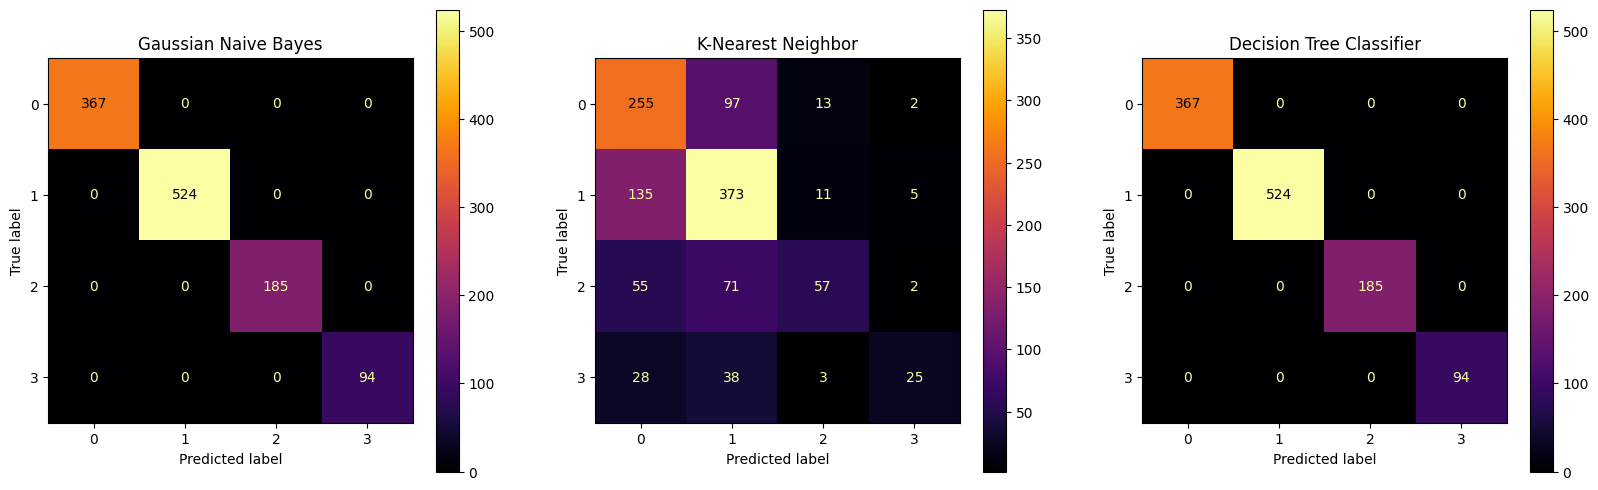

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Dari hasil confussion matrix diatas, dapat disimpulkan bahwa algoritma Gaussian Naive Bayes dan Decision Tree terlihat memiliki akurasi yang sempurna tanpa kesalahan klasifikasi, seperti yang terlihat dari elemen-elemen di luar diagonal yang tidak memiliki nilai selain nol. Ini bisa menunjukkan kinerja yang sangat tinggi dan berkemungkinan overfitting.

Sedangkan untuk algoritma K-Nearest Neighbor menunjukkan beberapa kesalahan klasifikasi, seperti yang terlihat dari sel-sel di luar diagonal dengan nilai selain nol. Misalnya, dari kelas 0 telah diklasifikasikan salah sebagai kelas 1, 2, atau 3, dan seterusnya untuk kelas lainnya. Hal ini menunjukkan bahwa mayoritas kinerja model bekerja dengan baik.

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def calculate_all_metrics(y_true, y_pred, y_prob, n_classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))
    roc_auc = roc_auc_score(y_true_binarized, y_prob, multi_class='ovr', average='macro')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

gnb_prob = gnb.predict_proba(x_test_norm)
knn_prob = knn.predict_proba(x_test_norm)
dtc_prob = dtc.predict_proba(x_test_norm)

gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

n_classes = len(np.unique(y_test))
gnb_metrics = calculate_all_metrics(y_test, gnb_pred, gnb_prob, n_classes)
knn_metrics = calculate_all_metrics(y_test, knn_pred, knn_prob, n_classes)
dtc_metrics = calculate_all_metrics(y_test, dtc_pred, dtc_prob, n_classes)

print('Gaussian Naive Bayes Metrics:')
print('Accuracy:', gnb_metrics['accuracy'])
print('Precision:', gnb_metrics['precision'])
print('Recall:', gnb_metrics['recall'])
print('F1 Score:', gnb_metrics['f1_score'])
print('ROC AUC:', gnb_metrics['roc_auc'])

print('\nK-Nearest Neighbors Metrics:')
print('Accuracy:', knn_metrics['accuracy'])
print('Precision:', knn_metrics['precision'])
print('Recall:', knn_metrics['recall'])
print('F1 Score:', knn_metrics['f1_score'])
print('ROC AUC:', knn_metrics['roc_auc'])

print('\nDecision Tree Metrics:')
print('Accuracy:', dtc_metrics['accuracy'])
print('Precision:', dtc_metrics['precision'])
print('Recall:', dtc_metrics['recall'])
print('F1 Score:', dtc_metrics['f1_score'])
print('ROC AUC:', dtc_metrics['roc_auc'])

Gaussian Naive Bayes Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0

K-Nearest Neighbors Metrics:
Accuracy: 0.6068376068376068
Precision: 0.6492979398268306
Recall: 0.49518012606717493
F1 Score: 0.524474235179222
ROC AUC: 0.8052499098161012

Decision Tree Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


Dari hasil diatas, dapat disimpulkan bahwa:

Algoritma Gaussian Naive Bayes dan Decision Tree Classifier menunjukkan hasil yang sempurna pada data tes, dengan skor 1.0 pada seluruh metrik, yakni akurasi, presisi, recall, skor f1, dan ROC AUC. Ini menunjukkan bahwa setiap prediksi yang dibuat oleh model ini adalah benar. Namun, skor sempurna ini dapat menunjukkan bahwa model telah overfit atau mungkin terjadi kebocoran data selama proses pelatihan model.

Sedangkan algoritma K-Nearest Neighbors (KNN) menunjukkan kinerja yang bervariasi. Akurasi sekitar 0.607 berarti bahwa sekitar 60.7% dari prediksi itu benar. Presisi sebesar 0.649 menunjukkan bahwa ketika model memprediksi suatu kelas, itu benar sekitar 64.9%. Skor recall sekitar 0.495 menandakan bahwa model tersebut secara benar mengidentifikasi 49.5% dari semua kasus positif di seluruh kelas. Skor f1, yang menyeimbangkan antara presisi dan recall, adalah sekitar 0.524. Skor ROC AUC sebesar 0.805 menunjukkan kemampuan model yang baik untuk membedakan antar kelas.

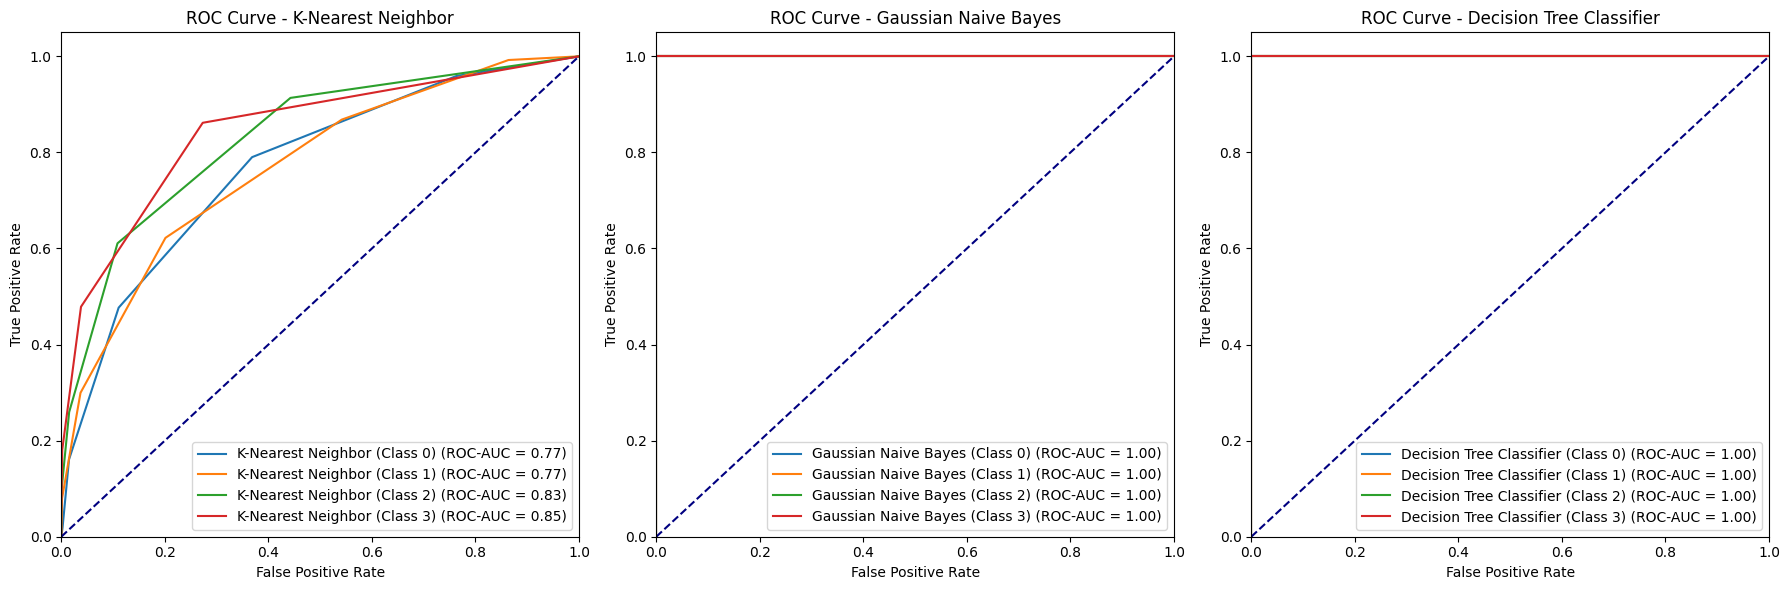

In [157]:
from sklearn.metrics import roc_auc_score, roc_curve

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_prob = model.predict_proba(x_test_norm)

    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
        roc_auc = roc_auc_score(y_test == model.classes_[i], y_prob[:, i])

        ax.plot(fpr, tpr, label=f'{name} (Class {model.classes_[i]}) (ROC-AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Pada K-Nearest Neighbor, AUC (Area Under the Curve) untuk setiap kelas berkisar antara 0.77 hingga 0.85, menunjukkan  tingkat diskriminasi yang baik hingga sangat baik. Nilai AUC lebih tinggi menunjukkan kemampuan yang lebih baik dari model untuk membedakan antara kelas positif dan negatif.

Untuk Gaussian Naive Bayes dan Decision Tree Classifier, pada setiap kelas memiliki skor AUC sempurna 1.0, yang menunjukkan bahwa model-model ini berhasil membedakan kelas-kelas dengan sempurna tanpa adanya kesalahan. Namun, nilai sempurna seperti ini bisa menimbulkan kecurigaan tentang overfitting atau kesalahan dalam proses evaluasi.

Secara keseluruhan, kurva ROC dan skor AUC memberikan informasi tentang seberapa baik model dapat membedakan antara kelas-kelas yang berbeda. Skor AUC yang sempurna dari Gaussian Naive Bayes dan Decision Tree mungkin perlu ditinjau kembali untuk memastikan tidak ada masalah dengan model atau evaluasinya, sedangkan hasil dari K-Nearest Neighbor lebih mencerminkan kinerja yang diharapkan dalam praktek umum.

##**Review Process**

###**Cross Validation**

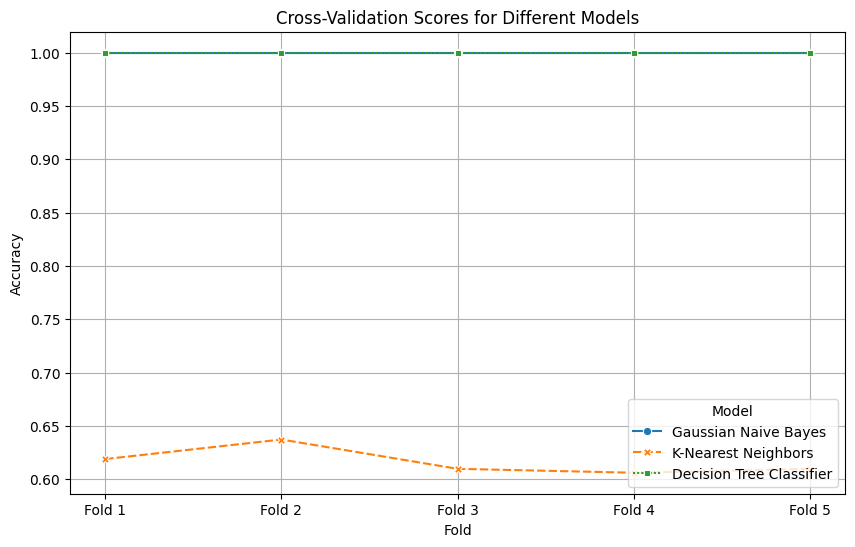

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Kesimpulan yang dapat diambil dari plot diatas adalah algoritma Gaussian Naive Bayes dan Decision Tree Classifier memiliki skor cross-validation tertinggi dibandingkan algoritma K-Nearest Neighbors. Pada plot ini, sumbu y mewakili skor akurasi, dan sumbu x mewakili model yang berbeda. Skor akurasi yang lebih tinggi menunjukkan bahwa model tersebut lebih baik dalam memprediksi label yang benar pada data yang tidak terlihat sebelumnya.

###**Feature Selection**

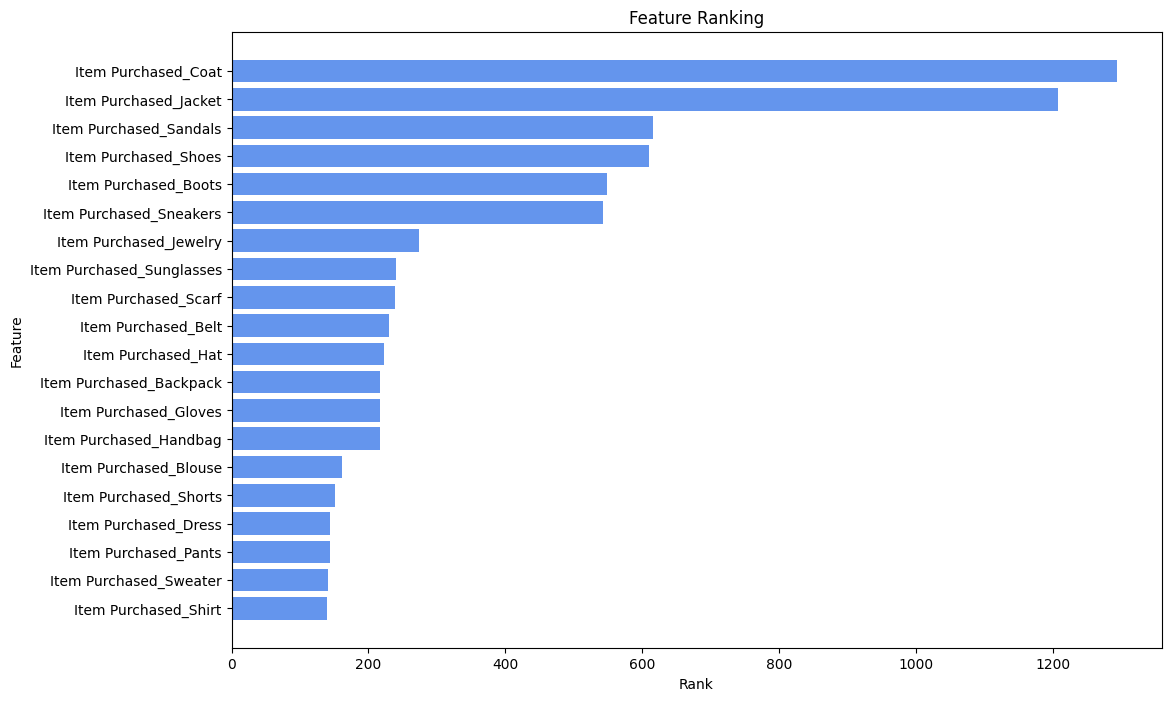

In [159]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=10)

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_ranks_df.head(20)
plt.barh(top_features['Feature'], top_features['Rank'], color='cornflowerblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Berdasarkan gambar diatas, dapat dilihat bahwa fitur dengan skor lebih tinggi dianggap memiliki korelasi yang lebih kuat dengan variabel target. Dalam hal ini, dua fitur teratas adalah **Item Purchased Coat** dan **Item Purchased Jacket**, yang menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh yang lebih signifikan dalam memprediksi hasil.

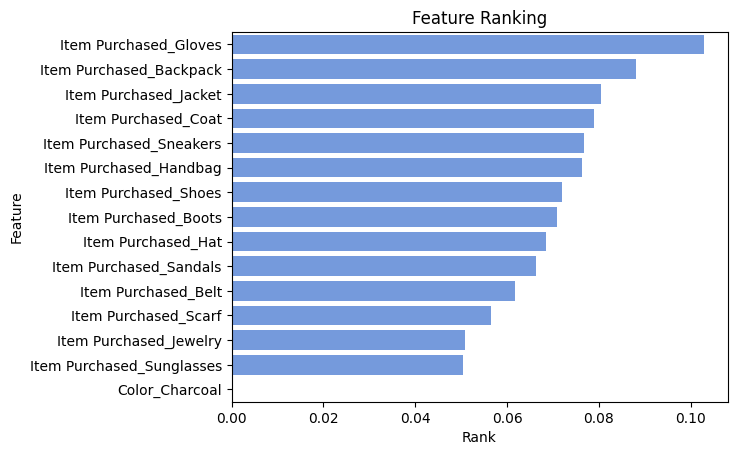

In [160]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)
top_feature_imp = feature_imp.head(15)

sns.barplot(x=top_feature_imp, y=top_feature_imp.index, color='cornflowerblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.show()

Berdasarkan gambar diatas dengan menggunakan algoritma dtc, dapat dilihat bahwa fitur dengan skor lebih tinggi dianggap memiliki korelasi yang lebih kuat dengan variabel target. Dalam hal ini, dua fitur teratas adalah **Item Purchased Handbag** dan **Item Purchased Gloves**, yang menunjukkan bahwa fitur-fitur tersebut memiliki pengaruh yang lebih signifikan dalam memprediksi hasil.

###**Tunning Hyperparameter**

In [161]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.8111308307896871}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


Berdasarkan output diatas, proses tuning hyperparameter untuk model Gaussian Naive Bayes menggunakan metode grid search dapat dipahami bahwa nilai `var_smoothing` terbaik adalah sekitar 0.811. Nilai akurasi model sebelum dan setelah proses tuning tidak mengalami perubahan, keduanya sempurna dengan skor 1.0.

In [162]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik: ", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = knn.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning: ", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning: ", acc_after_tuning)

Parameter terbaik:  {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Akurasi sebelum tuning:  0.6068376068376068
Akurasi setelah tuning:  0.6675213675213675


Berdasarkan output diatas, proses tunning hyperparameter untuk algoritma K-Nearest Neighbors menggunakan GridSearchCV, kombinasi parameter yang optimal ditemukan adalah menggunakan 11 tetangga terdekat `(n_neighbors)`, jarak 'euclidean' `(metric)` sebagai metrik, dan pemberian bobot berdasarkan jarak `(weights)`. Sebelum dilakukan tunning hyperparameter, akurasi model adalah sekitar 60.68%, yang menunjukkan kinerja yang cukup baik. Setelah dilakukan tunning hyperparameter, terjadi peningkatan akurasi menjadi sekitar 66.75%, menandakan bahwa penyetelan parameter tersebut berhasil meningkatkan kemampuan model dalam mengklasifikasikan data uji.

In [163]:
param_grid = {
    'max_depth': [ 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik: ", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = dtc.fit(x_train_norm, y_train).score(x_test_norm, y_test)
print("Akurasi sebelum tuning: ", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning: ", acc_after_tuning)

Parameter terbaik:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning:  1.0
Akurasi setelah tuning:  1.0


Berdasarkan output diatas, proses tunning hyperparameter untuk algoritma Decision Tree Classifier menggunakan GridSearchCV berhasil menentukan bahwa kombinasi parameter terbaik untuk algoritma tersebut adalah dengan kedalaman maksimal `(max_depth)` adalah 20, jumlah sampel minimum untuk `(min_samples_leaf)` adalah 1, dan jumlah sampel minimum untuk membagi `(min_samples_split)` adalah 2. Meskipun tunning hyperparameter telah dilakukan, tidak ada perubahan dalam akurasi algoritma, baik sebelum maupun sesudah. Algoritma tetap menunjukkan akurasi sempurna, yaitu 1.0.

##**Determine Next Step**

#####**Gaussian Naive Bayes**

In [164]:
gnb = GaussianNB(var_smoothing=0.8111308307896871)
gnb.fit(x_train_norm, y_train)

GaussianNB(var_smoothing=0.8111308307896871)

#####**K-Nearest Neighbors**

In [165]:
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 11, weights = 'distance')
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

#####**Decision Tree Classifier**

In [166]:
dtc = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2)
dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=20)

In [167]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [168]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col_new = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction_new"])
knn_col_new = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction_new"])
dtc_col_new = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction_new"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col, gnb_col_new, knn_col_new, dtc_col_new], axis=1)

In [170]:
combined_data

,Unnamed: 0,Customer ID,Age,Gender,Purchase Amount (USD),Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,...,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much,Category,gnb_prediction,knn_prediction,dtc_prediction,gnb_prediction_new,knn_prediction_new,dtc_prediction_new
0,839,840,48,0,31,3,2.6,1,1,10,...,0,1,0,1,1,1,1,1,1,1
1,1717,1718,29,0,50,1,2.9,0,0,16,...,0,1,0,1,1,1,1,1,1,1
2,321,322,41,0,36,1,4.7,1,1,48,...,0,0,1,2,2,1,2,2,1,2
3,3187,3188,67,1,72,0,3.2,0,0,28,...,0,1,0,1,1,1,1,1,1,1
4,2269,2270,49,0,38,2,4.4,0,0,27,...,0,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,2184,2185,38,0,34,3,3.2,0,0,16,...,0,1,0,2,2,2,2,2,2,2
1166,1178,1179,37,0,22,3,4.9,1,1,23,...,0,1,0,1,1,1,1,1,1,1
1167,1791,1792,62,0,98,0,4.0,0,0,38,...,0,1,0,1,1,1,1,1,0,1
1168,361,362,65,0,96,3,2.6,1,1,45,...,0,0,1,1,1,0,1,1,1,1


####**Kesimpulan**

Berdasarkan analisis beragam matriks dan proses tunning hyperparameter, kinerja dari algoritma K-Nearest Neighbors (KNN) setelah tuning paling optimal jika dibandingkan dengan Gaussian Naive Bayes (GNB) dan Decision Tree Classifier (DTC), yang keduanya menunjukkan akurasi sempurna 1.0 sebelum dan sesudah tunning. Meskipun akurasi sempurna bisa menandakan model yang baik, tetapi pada kasus ini, hal tersebut memiliki potensi overfitting, karena skor sempurna sangat jarang terjadi. Sementara itu, KNN menunjukkan peningkatan akurasi dari 60.68% menjadi sekitar 66.75% setelah tuning, menunjukkan adanya peningkatan kinerja yang substantif dan lebih mencerminkan kinerja yang realistis. Peningkatan ini, bersamaan dengan AUC yang baik untuk setiap kelas yang beragam dari 0.77 hingga 0.85, mengindikasikan bahwa KNN mampu membedakan kelas dengan baik dan menunjukkan kinerja yang lebih konsisten. Jadi, dapat disimpulkan bahwa metode terbaik untuk melakukan klasifikasi pada kasus ini adalah menggunakan algoritma **K-Nearest Neighbors**

